,State,murder.rate,college
,<chr>,<dbl>,<dbl>
1,Alabama,7.4,20.4
2,Alaska,4.3,28.1
3,Arizona,7.0,24.6
4,Arkansas,6.3,18.4
5,California,6.1,27.5
6,Colorado,3.1,34.6


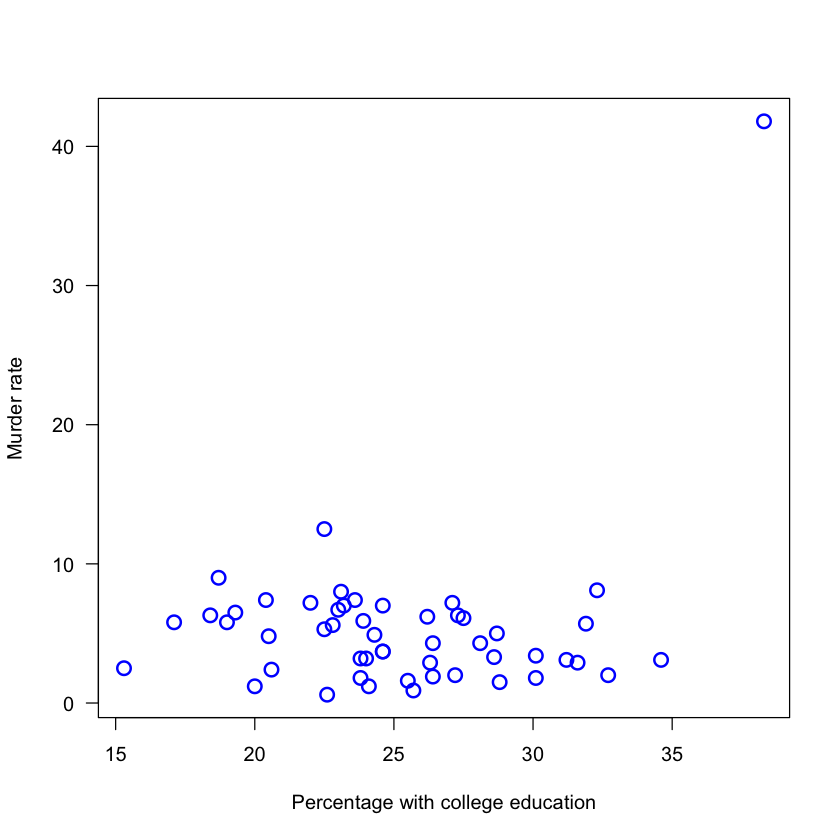

In [2]:
# Slide 7:
crime <- read.delim("Data/us_statewide_crime.txt")
crime<-crime[,c(1,3,6)]
head(crime)

plot(crime$college, crime$murder.rate, xlab="Percentage with college education",
     ylab="Murder rate", las=1, cex = 1.5, col = "blue", lwd = 2)

In [3]:
# Slide 14:
x <- crime$college
y <- crime$murder.rate
(beta <- sum((x-mean(x))*(y-mean(y)))/sum((x-mean(x))^2))

(alpha <- mean(y)- beta*mean(x))

Fitted <- alpha + beta*x
Resid <- y - Fitted
sigma2 <- sum(Resid^2)/(length(y)-2)
sqrt(sigma2)

[1] 0.33307

[1] -3.058072

[1] 5.61458

In [4]:
# Slide 15:
reg1 <- lm(murder.rate ~  college, data = crime)
summary(reg1)


Call:
lm(formula = murder.rate ~ college, data = crime)

Residuals:
   Min     1Q Median     3Q    Max 
-5.833 -3.368 -1.403  1.981 32.101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -3.0581     4.3630  -0.701   0.4867  
college       0.3331     0.1703   1.955   0.0563 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.615 on 49 degrees of freedom
Multiple R-squared:  0.07238,	Adjusted R-squared:  0.05345 
F-statistic: 3.823 on 1 and 49 DF,  p-value: 0.05626


In [5]:
# Slide 16:
confint(reg1)
#Nice table
tab <- cbind(coef(summary(reg1))[ , 1:2], "Lower" = confint(reg1)[ , 1],
             "Upper" = confint(reg1)[ , 2])
tab
#Nice table with p-values
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(reg1))[ , 4], digits = 3, eps = 1e-3))


,2.5 %,97.5 %
(Intercept),-11.825900553,5.7097573
college,-0.009244278,0.6753843


,Estimate,Std. Error,Lower,Upper
(Intercept),-3.058072,4.3630260,-11.825900553,5.7097573
college,0.333070,0.1703416,-0.009244278,0.6753843


,Estimate,Std..Error,Lower,Upper,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-3.06,4.36,-11.83,5.71,0.4867
college,0.33,0.17,-0.01,0.68,0.0563


,State,murder.rate,college
,<chr>,<dbl>,<dbl>
9,District of Columbia,41.8,38.3


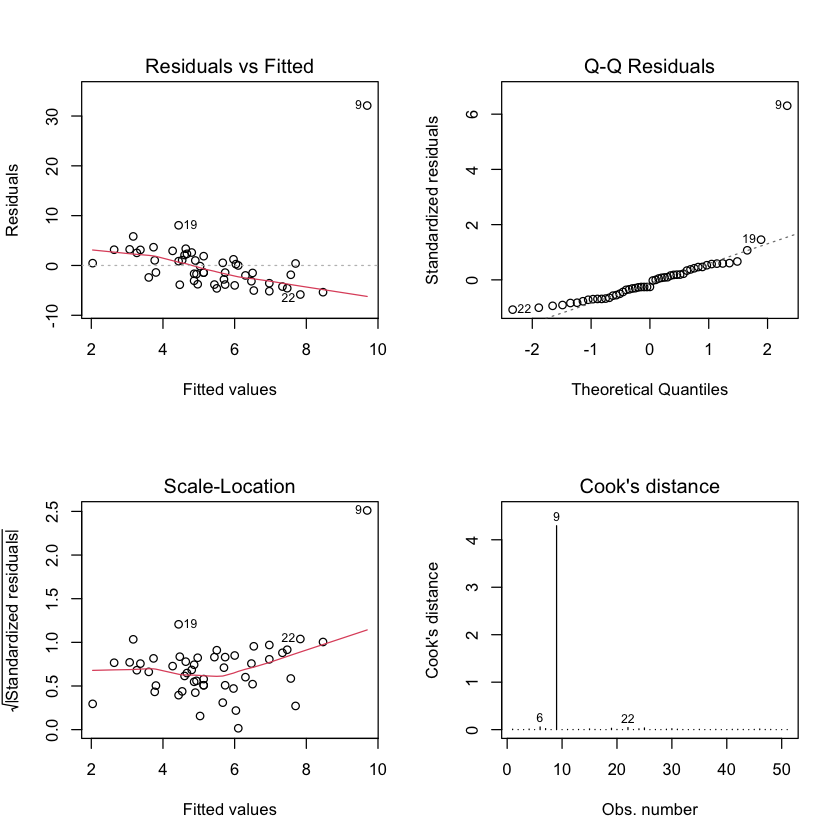

In [6]:
# Slide 21:

par(mfrow = c(2, 2))
plot(reg1, which = 1:4)
par(mfrow = c(1, 1))


crime[9,]

In [7]:
# Slide 23:

1-(1-2*(1-pnorm(reg1$res[9]/sqrt(sigma2))))^51

9 
5.512491e-07

In [8]:
# Slide 24:

crime50 <- crime[-9, ]
reg2 <- lm(murder.rate ~  college, data = crime50)

(sigma.new<-summary(reg2)$sigma)

1-(1-2*(1-pnorm(reg1$res[9]/sigma.new)))^51

[1] 2.464061

9 
0

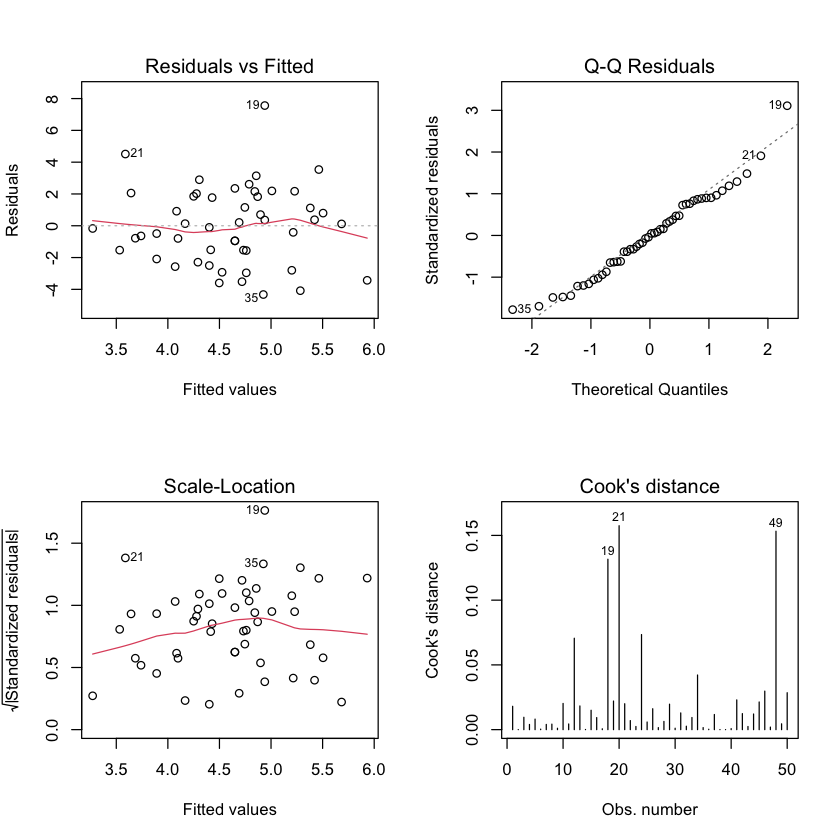

In [9]:
# Slide 26:


par(mfrow = c(2, 2))
plot(reg2, which = 1:4)
par(mfrow = c(1, 1))

In [10]:
# Slide 27:

summary(reg2)


Call:
lm(formula = murder.rate ~ college, data = crime50)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3255 -1.5533  0.0073  1.8450  7.5607 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.04159    2.06478   3.895 0.000304 ***
college     -0.13788    0.08163  -1.689 0.097687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.464 on 48 degrees of freedom
Multiple R-squared:  0.0561,	Adjusted R-squared:  0.03644 
F-statistic: 2.853 on 1 and 48 DF,  p-value: 0.09769


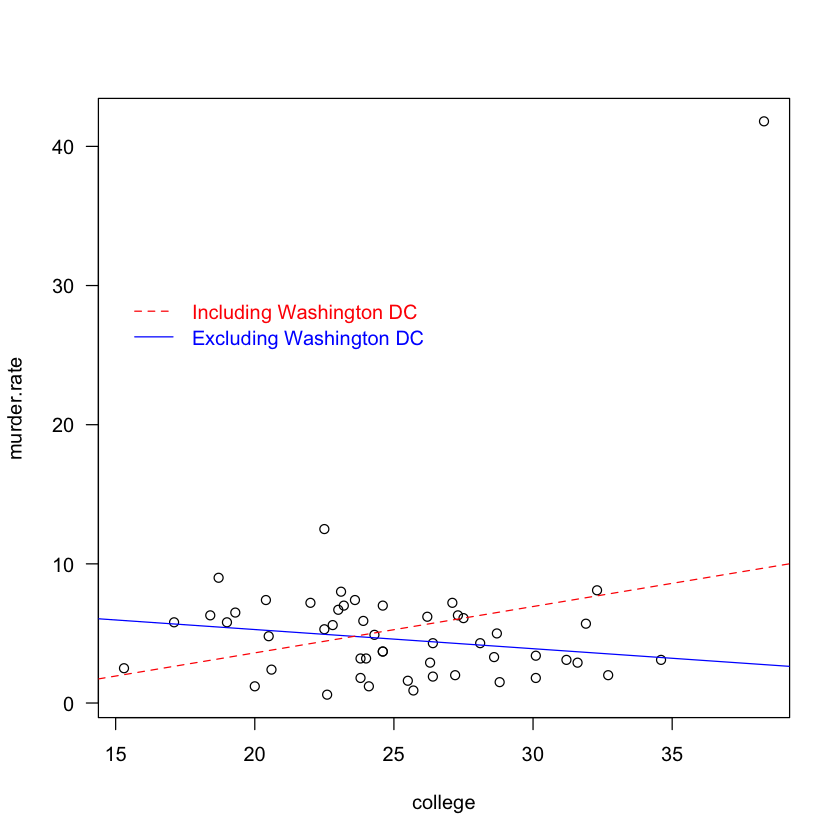

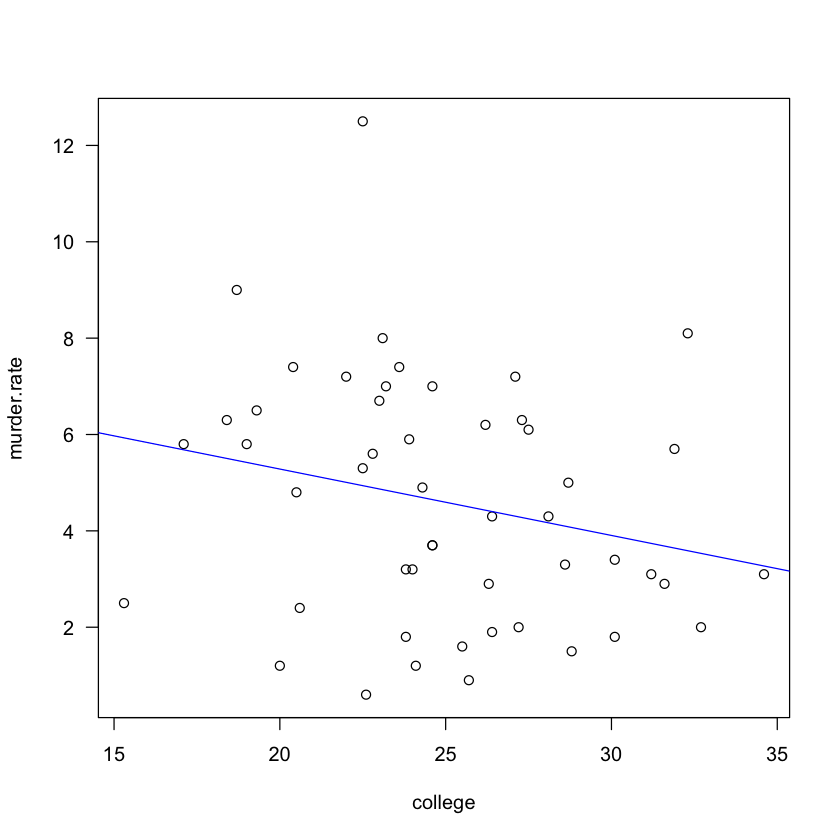

In [11]:
# Slide 28:
plot(murder.rate ~ college, data = crime, las=1)
abline(reg2,font=2,col="blue")
abline(reg1,font=2,col="red",lty=2)

legend(15,30,c("Including Washington DC","Excluding Washington DC"),
       lty=c(2,1),col=c("red","blue"),text.col=c("red","blue"),bty="n")

plot(murder.rate ~ college, data = crime50, las=1)
abline(reg2,font=2,col="blue")

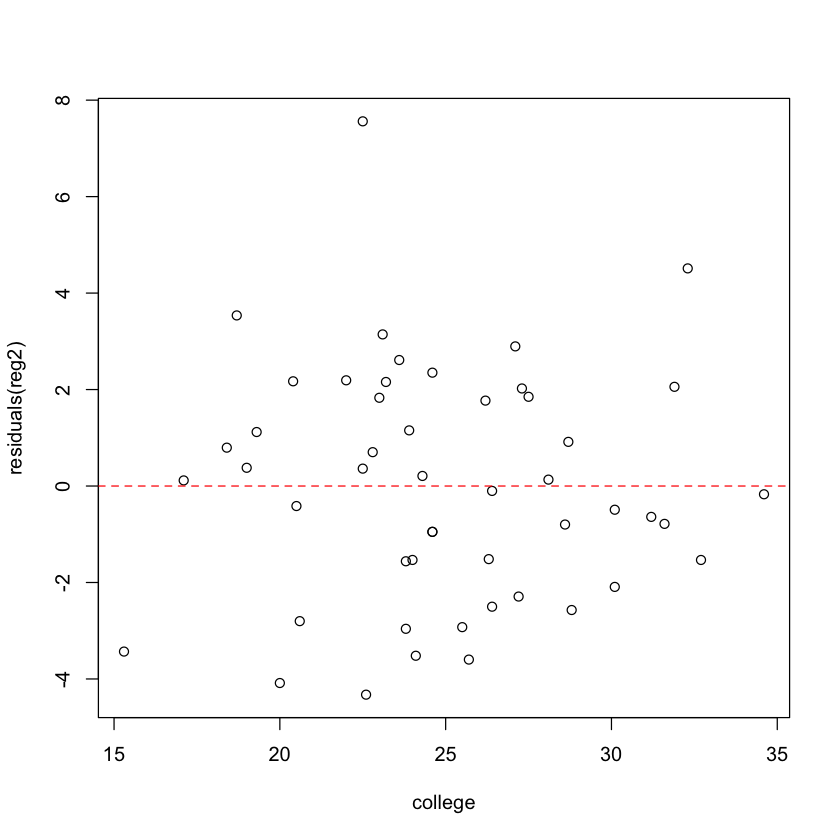

In [12]:
# Slide 29:

plot(residuals(reg2) ~ college, data=crime50)
abline(h = 0, lty = 2,col="red")

Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 4.5.1”


           Test stat Pr(>|Test stat|)
college      -0.1277           0.8989
Tukey test   -0.1277           0.8984


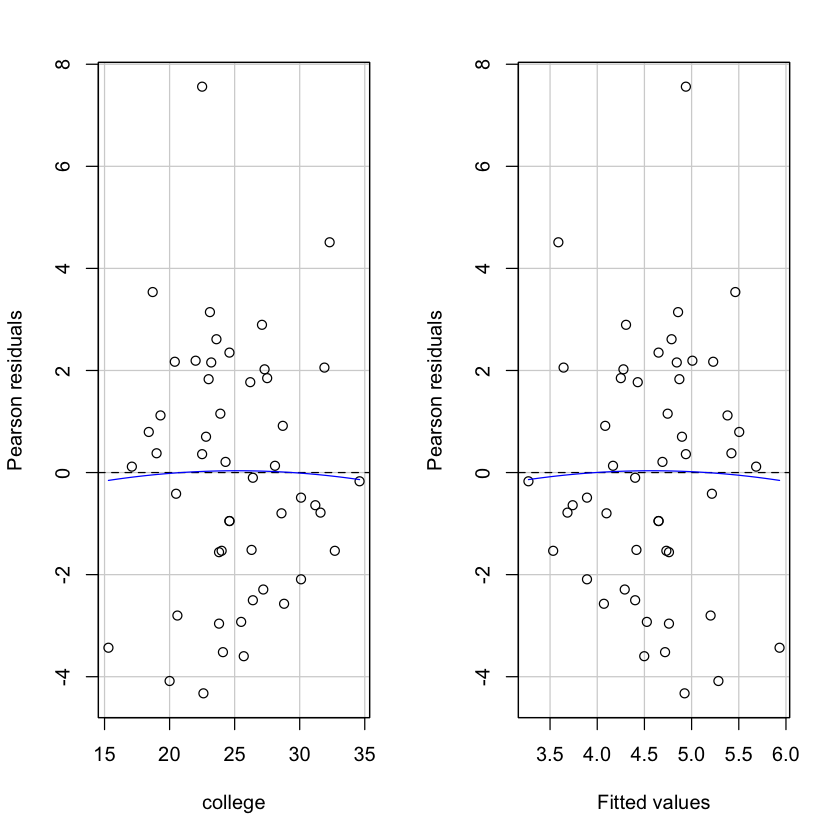

In [13]:
# Slide 30:
#Using the car package (Companion to Applied Regression)
# install.packages("car")
library(car)
residualPlots(reg2)

In [14]:
# Slide 31:

# curvature college:
reg3<-update(reg2,~.+I(college^2))
drop1(reg3,test="F")

# curvature fitted values (Tukeys test):
reg3<-update(reg2,~.+I(fitted(reg2)^2))
drop1(reg3,test="F")


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,291.3355,94.12263,NA,NA
college,1,0.01645109,291.3520,92.12545,0.002653989,0.9591320
I(college^2),1,0.10107908,291.4366,92.13997,0.016306686,0.8989331


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,291.3355,94.12263,NA,NA
college,1,0.4288592,291.7644,92.19618,0.06918614,0.7936751
I(fitted(reg2)^2),1,0.1010791,291.4366,92.13997,0.01630669,0.8989331


In [15]:
# Slide 34:

set.seed(1238)
ks.test(rnorm(100),"pnorm")
# p=0.82

ks.test(abs(rnorm(100)),"pexp")
# p=0.17


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  rnorm(100)
D = 0.063339, p-value = 0.8172
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  abs(rnorm(100))
D = 0.1113, p-value = 0.1678
alternative hypothesis: two-sided


In [16]:
# Slide 35:

ks.test(rnorm(100)+0.008*rexp(100),"pnorm")
# p=0.34 


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  rnorm(100) + 0.008 * rexp(100)
D = 0.09152, p-value = 0.3721
alternative hypothesis: two-sided


In [17]:
# Slide 36:

ks.test(rnorm(100000)+0.008*rexp(100000),"pnorm")
# p=0.0003 significant


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  rnorm(1e+05) + 0.008 * rexp(1e+05)
D = 0.0056496, p-value = 0.003378
alternative hypothesis: two-sided


In [18]:
# Slide 37:

qt(0.025,df=48)

[1] -2.010635

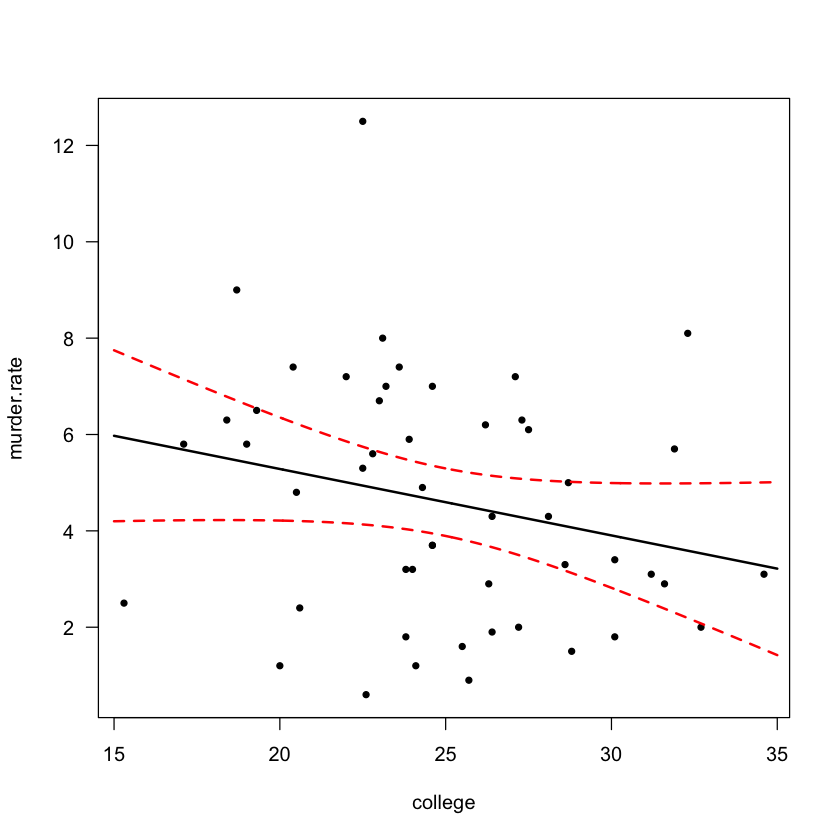

In [19]:
# Slide 38:

xval <- seq(from=15, to=35, length.out=500)
newData <- data.frame(college=xval)
Pred.ci <- predict(reg2, newdata=newData,
                   interval="confidence",
                   level=.95)

plot(murder.rate ~ college, data = crime50, pch = 20, las = 1)
lines(xval, Pred.ci[, "fit"], lwd=2)  ## or use: abline(reg2)
lines(xval, Pred.ci[, "lwr"], lty=2, col="red", lwd=2)
lines(xval, Pred.ci[, "upr"], lty=2, col="red", lwd=2)

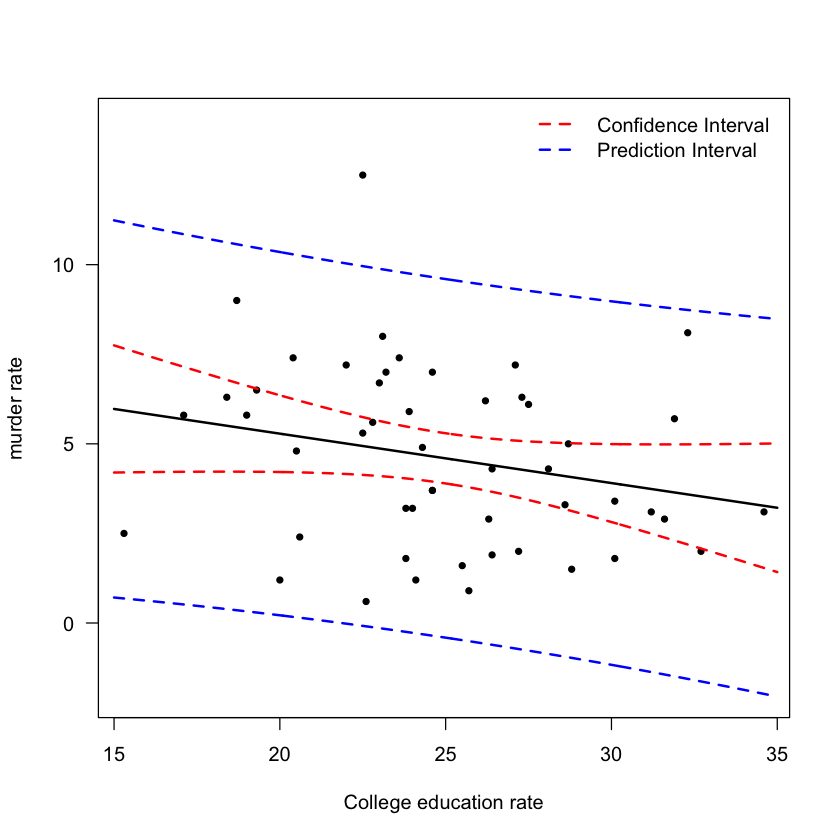

In [20]:
# Slide 40:

# redoing for wider range:
plot(murder.rate ~ college, data = crime50, pch = 20, las = 1, 
     ylim=c(-2,14),xlab="College education rate",ylab="murder rate")
lines(xval, Pred.ci[, "fit"], lwd=2)
lines(xval, Pred.ci[, "lwr"], lty=2, col="red", lwd=2)
lines(xval, Pred.ci[, "upr"], lty=2, col="red", lwd=2)

## Prediction interval for a new observation:
Pred.pi <- predict(reg2, newdata=newData,
                   interval="prediction")

## Add prediction intervals to plot:
lines(xval, Pred.pi[, "lwr"], lty=2,
      col="blue", lwd=2)
lines(xval, Pred.pi[, "upr"], lty=2,
      col="blue", lwd=2)
legend("topright",c("Confidence Interval","Prediction Interval"),
       lty=rep(2,1),lwd=rep(2,2),col=c("red","blue"),bty="n")

In [21]:
# Slide 45: 

#Nice table with p-values
tab <- cbind(coef(summary(reg2))[ , 1:2], "Lower" = confint(reg2)[ , 1],
             "Upper" = confint(reg2)[ , 2])
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(reg2))[ , 4], digits = 3, eps = 1e-3))


,Estimate,Std..Error,Lower,Upper,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),8.04,2.06,3.89,12.19,<0.001
college,-0.14,0.08,-0.30,0.03,0.0977


    Density         Hardness     
 Min.   :24.70   Min.   : 413.0  
 1st Qu.:37.77   1st Qu.: 962.8  
 Median :41.80   Median :1195.0  
 Mean   :45.73   Mean   :1469.5  
 3rd Qu.:56.70   3rd Qu.:1980.0  
 Max.   :69.10   Max.   :3260.0  

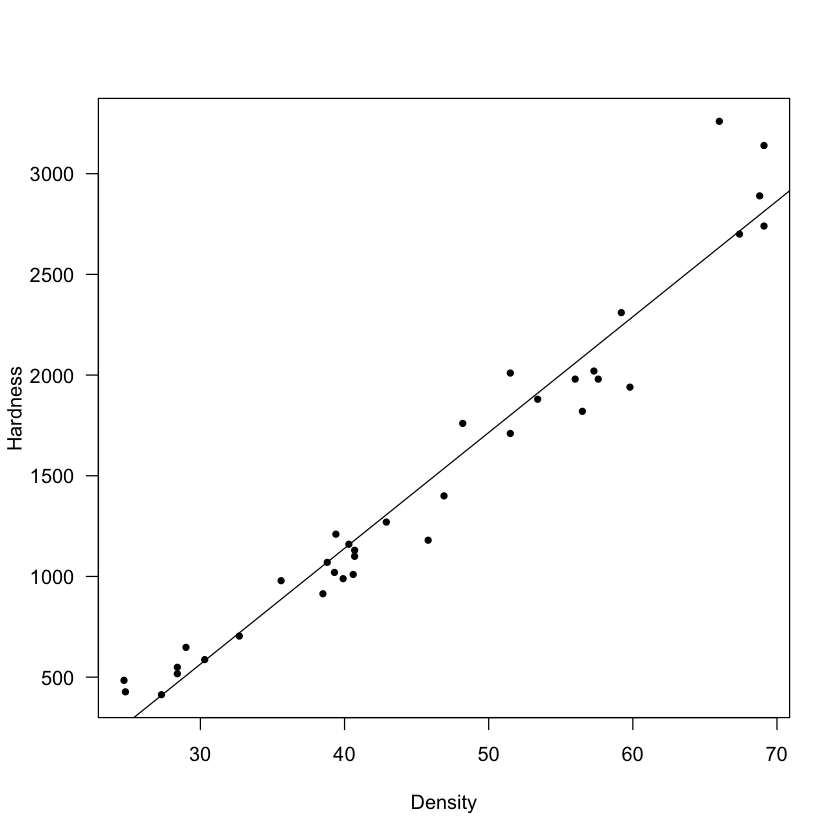

In [22]:
# Slide 47:


janka <- read.table("Data/janka.txt", header=TRUE, quote="\"")
names(janka) <- c("Density", "Hardness")
summary(janka)

reg3 <- lm(Hardness ~ Density, data = janka)
plot(Hardness ~ Density, data = janka, pch = 20, las = 1)
abline(reg3)

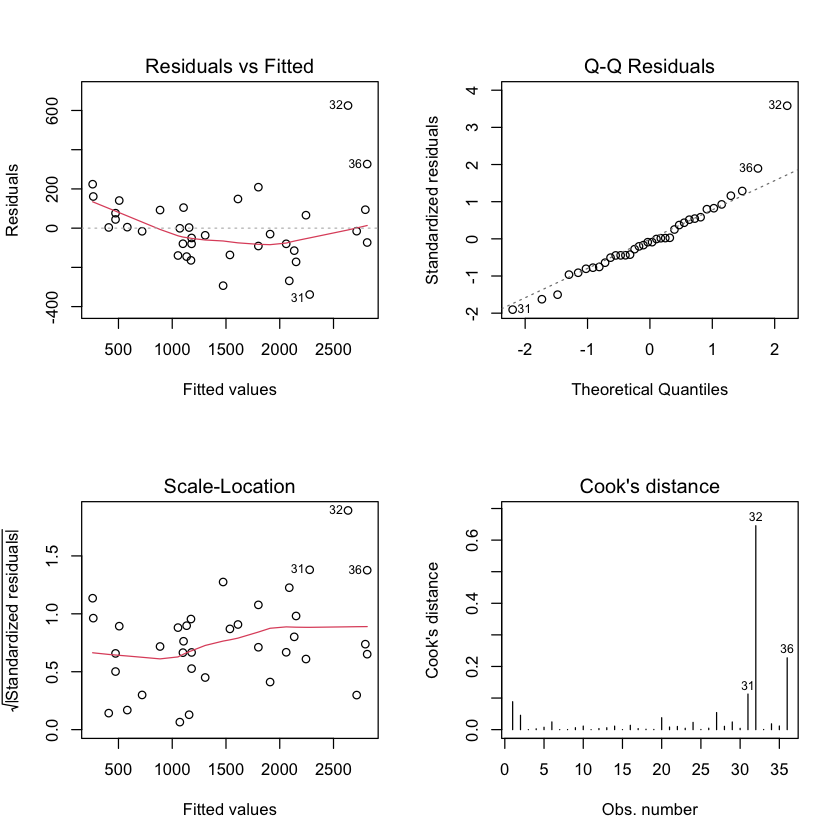

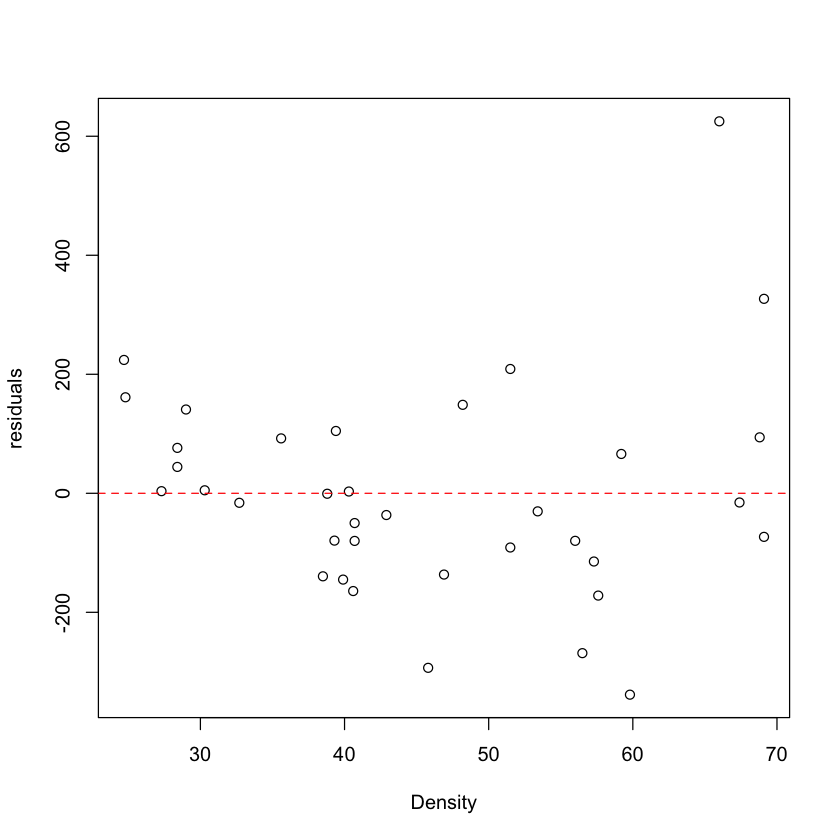

In [23]:
# Slide 48:

par(mfrow=c(2, 2))
plot(reg3, which=1:4)
par(mfrow=c(1, 1))

plot(residuals(reg3) ~ Density, data = janka, 
       ylab="residuals")
abline(h = 0,col="red",lty=2)

           Test stat Pr(>|Test stat|)   
Density       3.2483         0.002669 **
Tukey test    3.2483         0.001161 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


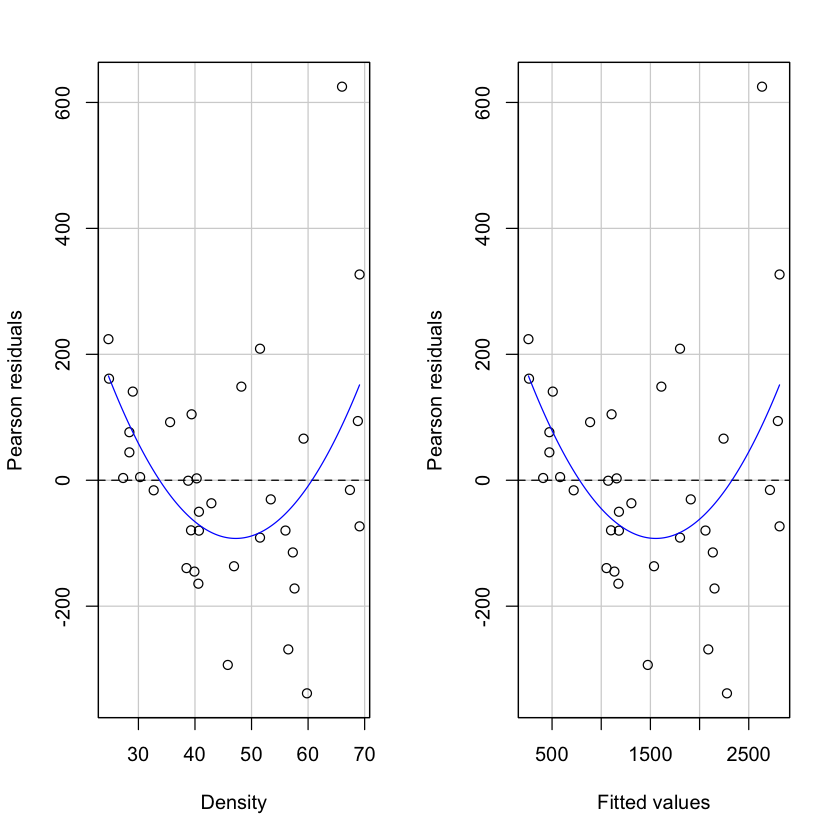

In [24]:
# Slide 49:
#Using the car package
residualPlots(reg3)

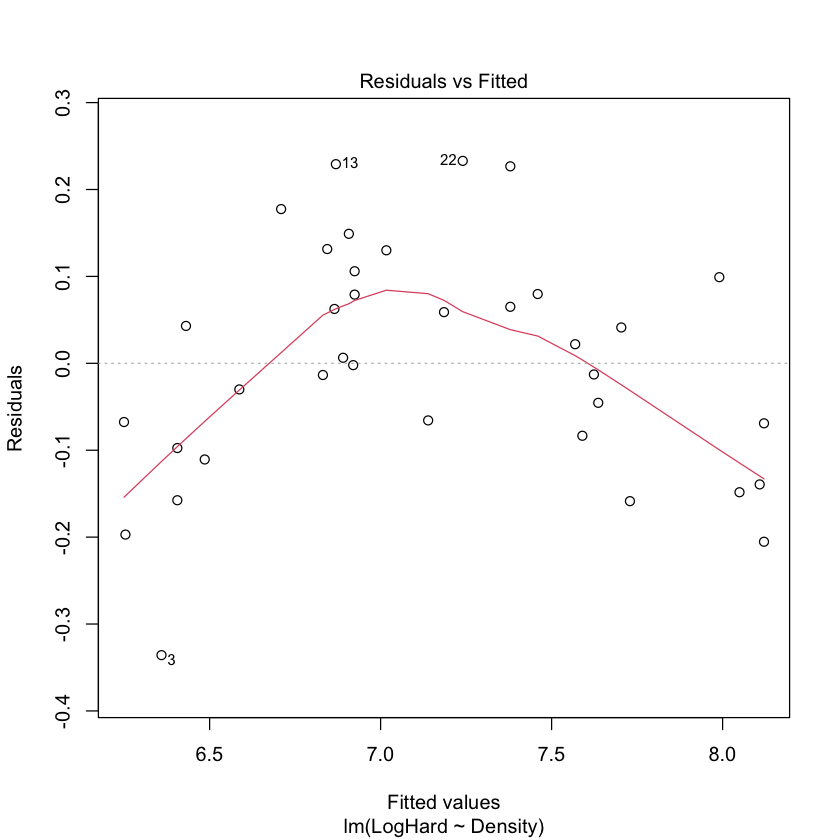

In [25]:
# Slide 51:

janka$LogHard <- log(janka$Hardness)
reg4 <- lm(LogHard ~ Density, data = janka)
plot(reg4, which=1)

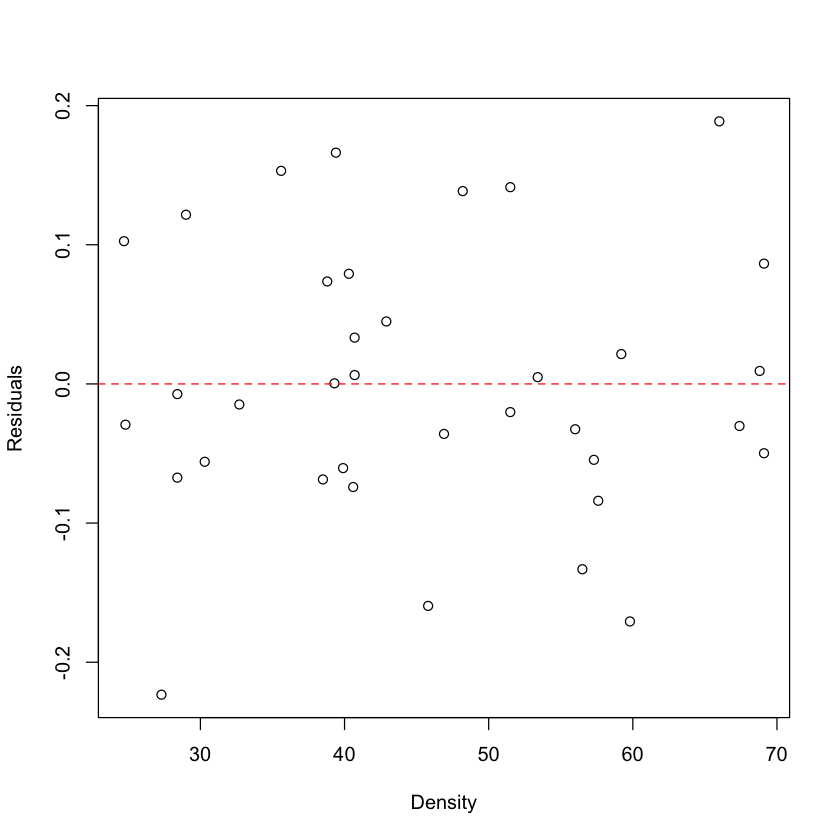

In [26]:
# Slide 52:

reg5 <- lm(LogHard ~ Density + I(Density^2), data = janka)
plot(residuals(reg5) ~ Density, data = janka, 
     ylab="Residuals")
abline(h = 0,lty=2,col="red")


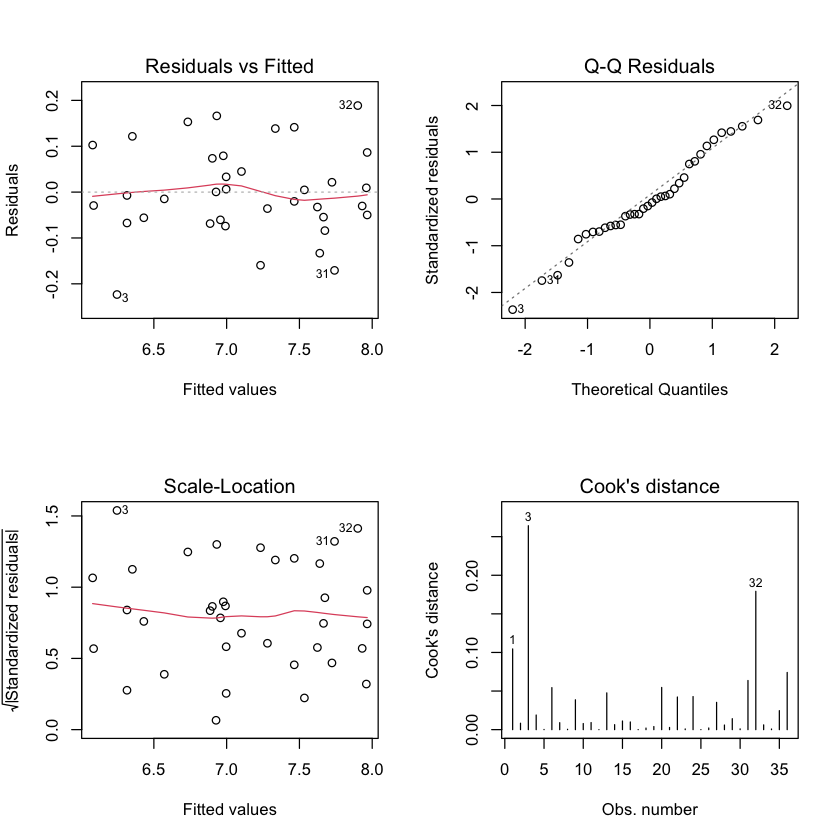

In [27]:
# Slide 53:

par(mfrow=c(2, 2))
plot(reg5, which=1:4)
par(mfrow=c(1, 1))

             Test stat Pr(>|Test stat|)   
Density         2.8529         0.007532 **
I(Density^2)    1.3611         0.183002   
Tukey test     -1.2757         0.202071   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


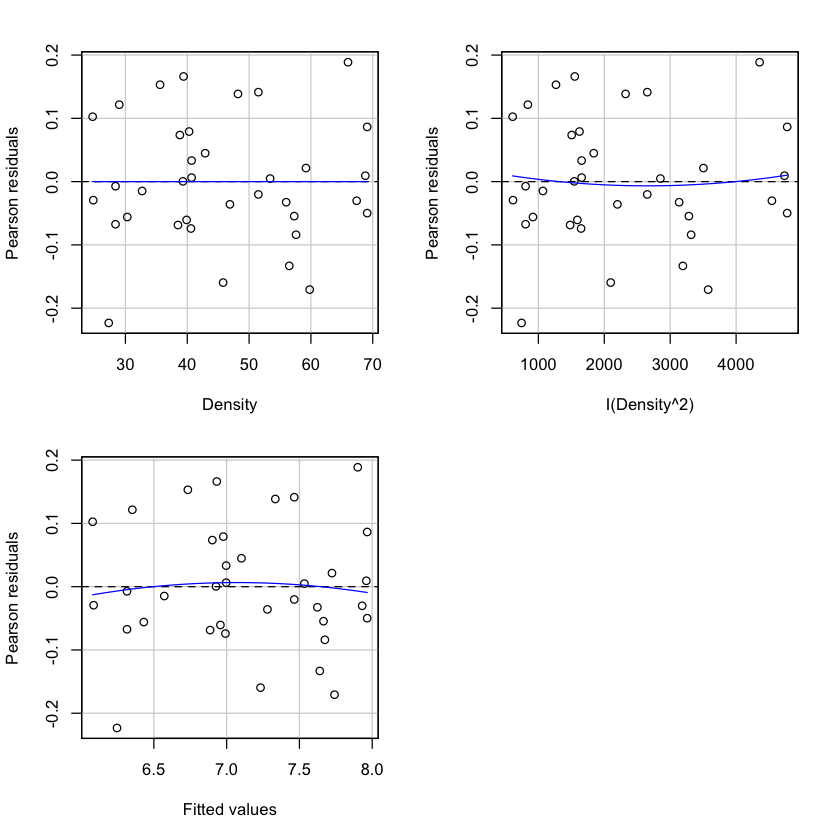

In [28]:
# Slide 54:

residualPlots(reg5)

In [29]:
# Slide 55:
summary(reg5)
drop1(reg5,test="F")


Call:
lm(formula = LogHard ~ Density + I(Density^2), data = janka)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22331 -0.05708 -0.01104  0.07500  0.18871 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.138e+00  2.087e-01  19.828  < 2e-16 ***
Density       9.152e-02  9.305e-03   9.835 2.45e-11 ***
I(Density^2) -5.228e-04  9.764e-05  -5.354 6.49e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1008 on 33 degrees of freedom
Multiple R-squared:  0.9723,	Adjusted R-squared:  0.9706 
F-statistic: 578.9 on 2 and 33 DF,  p-value: < 2.2e-16


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,0.3351043,-162.3660,NA,NA
Density,1,0.9822075,1.3173119,-115.0853,96.72465,2.452470e-11
I(Density^2),1,0.2911097,0.6262140,-141.8570,28.66755,6.485645e-06


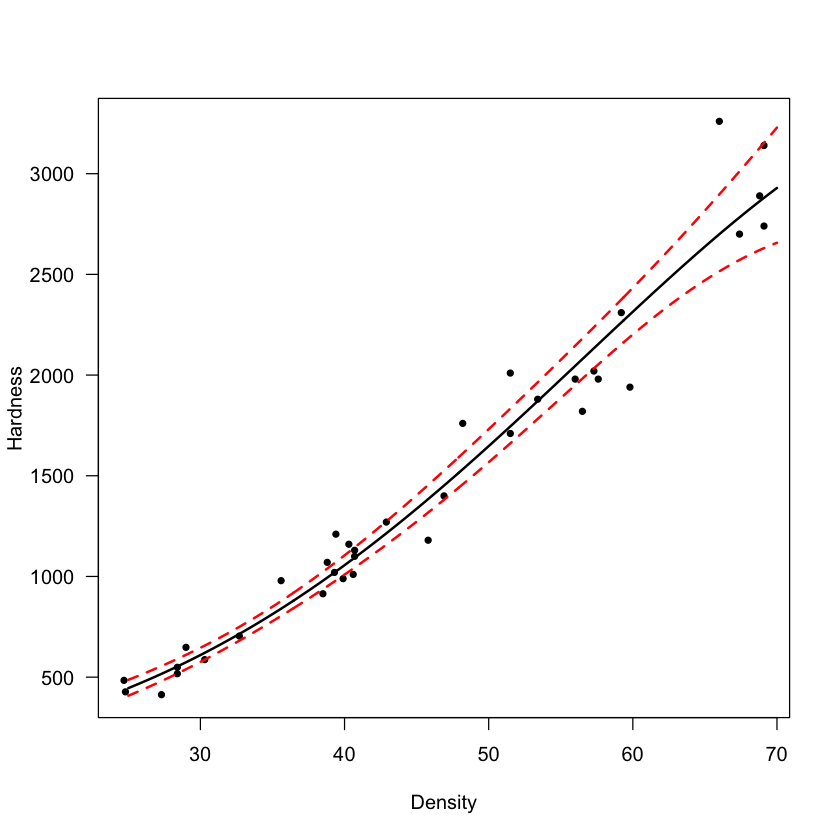

In [30]:
# Slide 58:

xval <- seq(from=25, to=70, length.out=500)
newData <- data.frame(Density=xval)
Pred.ci <- predict(reg5, newdata=newData,
                   interval="confidence",
                   level=.95)

plot(Hardness ~ Density, data = janka, pch = 20, las = 1)
lines(xval, exp(Pred.ci[, "fit"]), lwd=2)  
lines(xval, exp(Pred.ci[, "lwr"]), lty=2, col="red", lwd=2)
lines(xval, exp(Pred.ci[, "upr"]), lty=2, col="red", lwd=2)

In [31]:
# Slide 59:
my.se.fit<-predict(reg5, newdata=newData,
                   interval="confidence",
                   level=.95,se.fit=T)$se.fit

summary(exp(my.se.fit^2/2))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.000   1.000   1.001 